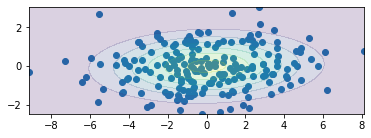

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

# set mean and covariance matrix
mean = [0, 0]
cov = [[10, 0.2], [0.2, 1]]  

# create random points for this cluster (this example only has one cluster)
x, y = np.random.multivariate_normal(mean, cov, 200).T


# create meshgrid for the plane
xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))

coordinate = np.vstack((xx.flatten(), yy.flatten())).T

det_cov = np.sqrt(np.linalg.det(cov)) 

density = np.zeros((np.shape(coordinate)[0],1))

for i in range(0,np.shape(coordinate)[0]):
    
    density[i] = (1/2/np.pi/det_cov)*np.exp((-1/2)*np.matmul(np.matmul((coordinate[i,:] - mean),np.linalg.inv(cov)),
              (coordinate[i,:] - mean).T))  
    
plt.scatter(x, y)
plt.contourf(xx, yy, np.reshape(density, np.shape(xx)), alpha=0.2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [2]:
from __future__ import division

mean1 = [-1, -1]
mean2 = [1, 1]

cov1 = [[.1, 0.01], [0.01, .1]]  
cov2 = [[.1, 0.01], [0.01, .1]]  


x1, y1 = np.random.multivariate_normal(mean1, cov1, 40).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 40).T

x = np.hstack((x1, x2)).T
y = np.hstack((y1, y2)).T

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))

coordinate = np.vstack((xx.flatten(), yy.flatten())).T

det_cov = np.sqrt(np.linalg.det(cov)) 

density = np.zeros((np.shape(coordinate)[0],1))

for i in range(0,np.shape(coordinate)[0]):
    
    density[i] = (1/2)*(1/2/np.pi/det_cov)*np.exp((-1/2)*np.matmul(np.matmul((coordinate[i,:] - mean1),np.linalg.inv(cov1)),
              (coordinate[i,:] - mean1).T))+\
    (1/2)*(1/2/np.pi/det_cov)*np.exp((-1/2)*np.matmul(np.matmul((coordinate[i,:] - mean2),np.linalg.inv(cov2)),
              (coordinate[i,:] - mean2).T))
    

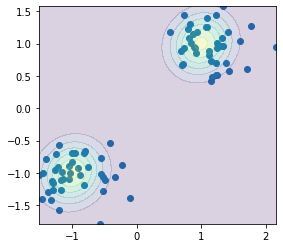

In [3]:
plt.scatter(x, y)
plt.contourf(xx, yy, np.reshape(density, np.shape(xx)), alpha=0.2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

mean1 = [-1, -1]
mean2 = [1, 1]

cov1 = [[.1, 0.01], [0.01, .1]]  
cov2 = [[.1, 0.01], [0.01, .1]]  


x1, y1 = np.random.multivariate_normal(mean1, cov1, 40).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 40).T

x = np.hstack((x1, x2)).T
y = np.hstack((y1, y2)).T

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))

coordinate = np.vstack((xx.flatten(), yy.flatten())).T

det_cov = np.sqrt(np.linalg.det(cov)) 

density = np.zeros((np.shape(coordinate)[0],1))

for i in range(0,np.shape(coordinate)[0]):
    
    density[i] = (1/2)*(1/2/np.pi/det_cov)*np.exp((-1/2)*np.matmul(np.matmul((coordinate[i,:] - mean1),np.linalg.inv(cov1)),
              (coordinate[i,:] - mean1).T))+\
    (1/2)*(1/2/np.pi/det_cov)*np.exp((-1/2)*np.matmul(np.matmul((coordinate[i,:] - mean2),np.linalg.inv(cov2)),
              (coordinate[i,:] - mean2).T))
    

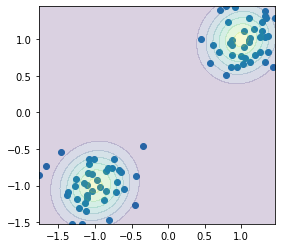

In [5]:

plt.scatter(x, y)
plt.contourf(xx, yy, np.reshape(density, np.shape(xx)), alpha=0.2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [6]:
maxIteration =100
num_clusters = 2 # 
num_dimensions = 2

coordinates = np.hstack((x.reshape(-1,1), y.reshape(-1,1)))


# Initializing the parameters of the mixture
# delineate my space (find the limits)
xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

# create a pool of possible positions 
xcoord = np.linspace(xmin, xmax, num_clusters*10)
ycoord = np.linspace(ymin, ymax, num_clusters*10)

# sample the coordinates of the initial mean estimates from the pool
xinit = np.random.choice(xcoord, num_clusters)
yinit = np.random.choice(ycoord, num_clusters)

guess_mean = np.hstack((xinit.reshape(-1,1), yinit.reshape(-1,1)))

# initialize my prior probabilities (of each clusters) to 1/num_clusters
phi = np.squeeze((1/num_clusters)*np.ones((num_clusters, 1)))

# initialize covariance to identity
guess_covariances = np.zeros((num_dimensions**2,num_clusters))

for j in range(num_clusters):
    
    guess_cov = np.eye(num_dimensions,num_dimensions)
    guess_covariances[:,j] = guess_cov.flatten()

# EM algorithm

gamma = np.zeros((np.shape(x)[0],num_clusters))


In [7]:
# displaying the original configuration

density = np.zeros((np.shape(xx.flatten())[0],1))

coordinates_grid = np.vstack((xx.flatten(), yy.flatten())).T

for i in range(0,np.shape(coordinates_grid)[0]):
    
    for j in range(num_clusters):

        cov_j = np.reshape(guess_covariances[:,j],[num_dimensions, num_dimensions])
        det_covj = np.sqrt(np.linalg.det(cov_j)) 
    
        density[i] += phi[j]*(1/2/np.pi/det_covj)*np.exp((-1/2)*np.matmul(np.matmul((coordinates_grid[i,:] - guess_mean[j,:]),np.linalg.inv(cov_j)),
                      (coordinates_grid[i,:] - guess_mean[j,:]).T))


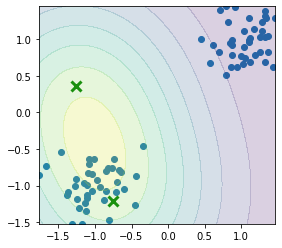

In [8]:
        
plt.scatter(x, y)
plt.scatter(guess_mean[:,0], guess_mean[:,1], color='green', marker = 'x', linewidths=3, s=100)
plt.contourf(xx, yy, np.reshape(density, np.shape(xx)), alpha=0.2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [9]:
coordinates= np.vstack((x, y)).T

from numpy import linalg as LA


for numIter < maxIter:
    

    
    # (1) E step  (=assignment step in K means)
    for i in range(np.shape(x)[0]):
        
        
        denom_gamma = np.zeros((len(x),1))
        gamma = np.zeros((len(x),num_clusters))
        
        for j in range(num_cluster):
            
            cov_j = np.reshape(guess_covariances[:,j],[num_dimensions, num_dimensions])
            
            det_covj = np.sqrt(np.linalg.det(cov_j)) 

            
            denom_gamma[i] += phi[j]*(1/2/np.pi/det_covj)*np.exp((-1/2)*np.matmul(np.matmul((coordinate_point[i,:] - guess_mean[j,:]),np.linalg.inv(cov_j)),
                      (coordinate_point[i,:] - guess_mean[j,:]).T))
            
    
        for j in range(num_clusters):
                
            cov_j = np.reshape(guess_covariances[:,j],[num_dimensions, num_dimensions])
            
            det_covj = np.sqrt(np.linalg.det(cov_j)) 
            
            coordinate_point = np.array([x[i], y[i]])
            # gaussi
            gamma_ij = (1/2/np.pi/det_covj)*np.exp((-1/2)*np.matmul(np.matmul((coordinate_point[i,:] - guess_mean[j, :]),np.linalg.inv(cov_j)),
                      (coordinate_point[i,:] - guess_mean[j,:]).T))*phi[j]

            gamma[i,j] = gamma_ij/denom_gamma[i]
    
    
    # M Step 
    
    guess_mean = np.zeros((num_clusters, num_dimensions))
    ones_tmp = np.ones((np.shape(x)[0], 1))
    
    guess_covariances = np.zeros((num_dimensions**2, num_clusters))
    
    phi = np.zeros((num_clusters, 1))
    
    for j in range(num_clusters):
        
        guess_mean[j,:] = np.matmul(coordinates.T, gamma[:,j])/np.matmul(ones_tmp, gamma[:,j])
        
        
        tmp2 = np.matmul(gamma[:,j], np.ones((1, 2)))
        tmp_cov = np.multiply((coordinates - guess_mean[j,:]).T,tmp2.T) 
        
        covariance_num = np.matmul(tmp_cov,(coordinates - guess_mean[j,:])) 
        covariance_tmp = covariance_num/np.matmul(ones_tmp, gamma[:,j])
    
        guess_covariances[:,j] = covariance_tmp.flatten()
    
        phi[j] = np.matmul(ones_tmp, gamma[:,j])/len(x)
        
        



SyntaxError: invalid syntax (<ipython-input-9-f5f307192023>, line 6)